In [1]:
import numpy as np
import pandas as pd
import _pickle as pickle
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
with open('fingerprint.dat', 'rb') as fp:
    X_train = pickle.load(fp)
    X_train_std = pickle.load(fp)
    X_test = pickle.load(fp)
    X_test_std = pickle.load(fp)
    y_train = pickle.load(fp)
    y_test = pickle.load(fp)
    X_std_pca = pickle.load(fp)

In [3]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("X_std_pca shape: ", X_std_pca.shape)
print("X_std_pca dimension: ", X_std_pca.ndim)

X_train shape:  (400, 6)
X_test shape:  (100, 6)
y_train shape:  (400,)
y_test shape:  (100,)
X_std_pca shape:  (400, 2)
X_std_pca dimension:  2


# Machine learning classification models implementation

### 1. Logistic regression 

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [5]:
final_score_list = [] #Catch the final score of each m/c learning model

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
log_model = LogisticRegression(solver = 'lbfgs', random_state = 42)
log_scores = cross_val_score(log_model, X_train_std, y_train, cv = 10)
print("log_scores: ", log_scores)
print("Mean score: ", log_scores.mean())
print("Std deviation: ", log_scores.std())

log_scores:  [0.925 0.9   0.95  0.95  1.    1.    0.875 0.925 0.95  0.9  ]
Mean score:  0.9375
Std deviation:  0.03913118960624631


In [8]:
log_model.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
log_reg_score = log_model.score(X_test_std, y_test)
final_score_list.append(log_reg_score)
log_reg_score

0.94

In [10]:
log_yy_pred = log_model.predict(X_test_std) 

In [11]:
log_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=log_yy_pred)
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=log_yy_pred).ravel()
print(tn, fp, fn, tp)

print(log_model_confMatrix)

48 2 4 46
[[48  2]
 [ 4 46]]


In [12]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=log_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=log_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=log_yy_pred))

Precision: 0.958
Recall: 0.920
F1: 0.939


In [13]:
log_model_fg_patches_x , log_model_fg_patches_y = [], []
log_model_bg_patches_x, log_model_bg_patches_y = [], []

for i in range(len(X_std_pca)):
    if y_train.iloc[i] == 0:
        log_model_bg_patches_x.append(X_std_pca[i][0])
        log_model_bg_patches_y.append(X_std_pca[i][1])
    elif y_train.iloc[i] == 1:
        log_model_fg_patches_x.append(X_std_pca[i][0])
        log_model_fg_patches_y.append(X_std_pca[i][1])

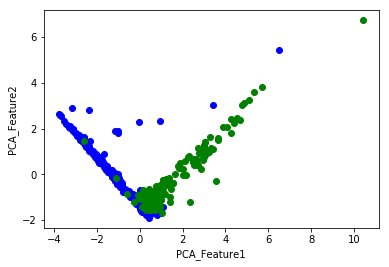

In [14]:
plt.plot(log_model_fg_patches_x, log_model_fg_patches_y, 'bo', label='Foreground')
plt.plot(log_model_bg_patches_x, log_model_bg_patches_y, 'go', label='Background')

plt.xlabel('PCA_Feature1')
plt.ylabel('PCA_Feature2')

plt.show()

#### Calaculation using pca features 

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components = 6)
pca.fit(X_train_std)
X_std_train_pca = pca.transform(X_train_std)

X_std_test_pca = pca.transform(X_test_std)
# X_std_test_pca = pca.fit_transform(X_test_std)
log_model.fit(X_std_train_pca, y_train)

X_std_test_pca.shape

(100, 6)

In [17]:
log_model_score_pca = log_model.score(X_std_test_pca, y_test)
log_model_score_pca

0.94

#### Logistic Regression
##### Mean score:  0.9375 +/- 0.039
##### Final score: 0.94

### 2.1 Support Vector Machines - SVC linear  

In [18]:
from sklearn.svm import SVC

In [19]:
#Best estimator obtained from 02_hyp_svc_linear_and_rbf file
svm_linear_model = SVC(C=49, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
svm_linear_scores = cross_val_score(svm_linear_model, X_train_std, y_train, cv = 10)
print("svm_linear_scores: ", svm_linear_scores)
print("Mean score: ", svm_linear_scores.mean())
print("Std deviation: ", svm_linear_scores.std())

svm_linear_scores:  [0.925 0.9   0.95  0.975 1.    1.    0.9   0.925 0.95  0.875]
Mean score:  0.9400000000000001
Std deviation:  0.04062019202317979


In [21]:
svm_linear_model.fit(X_train_std, y_train)
svm_linear_score = svm_linear_model.score(X_test_std, y_test)
final_score_list.append(svm_linear_score)

svm_linear_score

0.98

In [22]:
svm_linear_yy_pred = svm_linear_model.predict(X_test_std) 
svm_linear_yy_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [23]:
svm_linear_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=svm_linear_yy_pred)
print(svm_linear_model_confMatrix)

[[50  0]
 [ 2 48]]


In [24]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=svm_linear_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=svm_linear_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=svm_linear_yy_pred))

Precision: 1.000
Recall: 0.960
F1: 0.980


In [25]:
svmlr_model_fg_patches_x , svmlr_model_fg_patches_y = [], []
svmlr_model_bg_patches_x, svmlr_model_bg_patches_y = [], []

for i in range(len(X_std_pca)):
    if y_train.iloc[i] == 0:
        svmlr_model_bg_patches_x.append(X_std_pca[i][0])
        svmlr_model_bg_patches_y.append(X_std_pca[i][1])
    elif y_train.iloc[i] == 1:
        svmlr_model_fg_patches_x.append(X_std_pca[i][0])
        svmlr_model_fg_patches_y.append(X_std_pca[i][1])

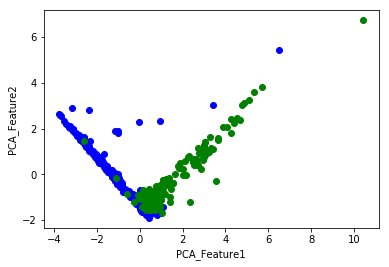

In [26]:
plt.plot(svmlr_model_fg_patches_x, svmlr_model_fg_patches_y, 'bo', label='Foreground')
plt.plot(svmlr_model_bg_patches_x, svmlr_model_bg_patches_y, 'go', label='Background')

plt.xlabel('PCA_Feature1')
plt.ylabel('PCA_Feature2')

plt.show()

#### SVM Linear
##### Mean score:  0.9405 +/- 0.0406
##### Final score: 0.98

### 2.2 Support Vector Machines - SVC Kernal(rbf)

In [27]:
#Best estimator obtained from 02_hyp_svc_linear_and_rbf file
svm_rbf_model = SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
svm_rbf_scores = cross_val_score(svm_rbf_model, X_train_std, y_train, cv = 10)
print("svm_rbf_scores: ", svm_rbf_scores)
print("Mean score: ", svm_rbf_scores.mean())
print("Std deviation: ", svm_rbf_scores.std())

svm_rbf_scores:  [0.975 0.925 0.975 0.975 1.    0.975 0.925 0.95  0.975 0.95 ]
Mean score:  0.9624999999999998
Std deviation:  0.023048861143232204


In [29]:
svm_rbf_model.fit(X_train_std, y_train)
svm_rbf_score = svm_rbf_model.score(X_test_std, y_test)
final_score_list.append(svm_rbf_score)
svm_rbf_score

0.99

In [30]:
svm_rbf_yy_pred = svm_rbf_model.predict(X_test_std) 

In [31]:
svm_rbf_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=svm_rbf_yy_pred)
print(svm_rbf_model_confMatrix)

[[49  1]
 [ 0 50]]


In [32]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=svm_rbf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=svm_rbf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=svm_rbf_yy_pred))

Precision: 0.980
Recall: 1.000
F1: 0.990


#### SVM rbf model
##### Mean score:  0.96249 +/- 0.023
##### Final score: 0.99

### 3. Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
#Best estimator obtained from 03_hyp_dec_tree file
tree_clf_model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [35]:
tree_clf_scores = cross_val_score(tree_clf_model, X_train_std, y_train, cv = 10)
print("tree_clf_scores: ", tree_clf_scores)
print("Mean score: ", tree_clf_scores.mean())
print("Std deviation: ", tree_clf_scores.std())

tree_clf_scores:  [0.975 0.95  0.975 1.    1.    0.975 0.925 0.95  1.    0.925]
Mean score:  0.9675
Std deviation:  0.027499999999999986


In [36]:
tree_clf_model.fit(X_train_std, y_train)
tree_clf_score = tree_clf_model.score(X_test_std, y_test)
final_score_list.append(tree_clf_score)
tree_clf_score

0.99

In [37]:
tree_clf_yy_pred = tree_clf_model.predict(X_test_std) 

In [38]:
tree_clf_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=tree_clf_yy_pred)
print(tree_clf_model_confMatrix)

[[49  1]
 [ 0 50]]


In [39]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=tree_clf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=tree_clf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=tree_clf_yy_pred))

Precision: 0.980
Recall: 1.000
F1: 0.990


#### Decision Tree Classifier
##### Mean score: 0.9675 +/- 0.02749
##### Final score: 0.99

### 4. Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#Best estimator obtained from 04_hyp_random_forest_clf file
random_forest_clf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
random_forest_clf_scores = cross_val_score(random_forest_clf_model, X_train_std, y_train, cv = 10)
print("random_forest_clf_scores: ", random_forest_clf_scores)
print("Mean score: ", random_forest_clf_scores.mean())
print("Std deviation: ", random_forest_clf_scores.std())

random_forest_clf_scores:  [0.975 0.95  0.975 0.975 1.    1.    0.925 0.95  1.    0.9  ]
Mean score:  0.9650000000000001
Std deviation:  0.03201562118716424


In [43]:
random_forest_clf_model.fit(X_train_std, y_train)
random_forest_clf_score = random_forest_clf_model.score(X_test_std, y_test)
final_score_list.append(random_forest_clf_score)
random_forest_clf_score

0.98

In [44]:
random_forest_clf_yy_pred = random_forest_clf_model.predict(X_test_std) 

In [45]:
random_forest_clf_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=random_forest_clf_yy_pred)
print(random_forest_clf_model_confMatrix)

[[49  1]
 [ 1 49]]


In [46]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=random_forest_clf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=random_forest_clf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=random_forest_clf_yy_pred))

Precision: 0.980
Recall: 0.980
F1: 0.980


#### Random Forest Classifier
##### Mean score:  0.9650+/- 0.0320
##### Final score: 0.98

### 5. Adaboost Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
#Best estimator obtained from 05_hyp_adaboost_clf file.
adaboost_clf_model = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=0.6, n_estimators=21, random_state=42)

In [49]:
adaboost_clf_model_scores = cross_val_score(adaboost_clf_model, X_train_std, y_train, cv = 10)
print("adaboost_clf_model_scores: ", adaboost_clf_model_scores)
print("Mean score: ", adaboost_clf_model_scores.mean())
print("Std deviation: ", adaboost_clf_model_scores.std())

adaboost_clf_model_scores:  [0.95  0.9   0.95  0.925 1.    0.95  0.9   0.925 1.    0.9  ]
Mean score:  0.9400000000000001
Std deviation:  0.035707142142714234


In [50]:
adaboost_clf_model.fit(X_train_std, y_train)
adaboost_clf_model_score = adaboost_clf_model.score(X_test_std, y_test)
final_score_list.append(adaboost_clf_model_score)
adaboost_clf_model_score

0.97

In [51]:
adaboost_clf_yy_pred = adaboost_clf_model.predict(X_test_std) 

In [52]:
adaboost_clf_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=adaboost_clf_yy_pred)
print(adaboost_clf_model_confMatrix)

[[49  1]
 [ 2 48]]


In [53]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=adaboost_clf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=adaboost_clf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=adaboost_clf_yy_pred))

Precision: 0.980
Recall: 0.960
F1: 0.970


#### Adaboost Classifier
##### Mean score: 0.9525 +/- 0.0410
##### Final score: 0.97

### 6. Gradient boost Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
#Best estimator obtained from 06_hyp_grdboost_clf file
gb_clf_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [56]:
gb_clf_model_scores = cross_val_score(gb_clf_model, X_train_std, y_train, cv = 10)
print("gb_clf_model_scores: ", gb_clf_model_scores)
print("Mean score: ", gb_clf_model_scores.mean())
print("Std deviation: ", gb_clf_model_scores.std())

gb_clf_model_scores:  [0.95  0.95  0.975 0.975 1.    0.975 0.95  0.95  1.    0.925]
Mean score:  0.9650000000000001
Std deviation:  0.022912878474779203


In [57]:
gb_clf_model.fit(X_train_std, y_train)
gb_clf_model_score = gb_clf_model.score(X_test_std, y_test)
final_score_list.append(gb_clf_model_score)
gb_clf_model_score

0.99

In [58]:
gb_clf_yy_pred = gb_clf_model.predict(X_test_std) 

In [59]:
gb_clf_model_confMatrix = confusion_matrix(y_true=y_test, y_pred=tree_clf_yy_pred)
print(gb_clf_model_confMatrix)

[[49  1]
 [ 0 50]]


In [60]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=gb_clf_yy_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=gb_clf_yy_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=gb_clf_yy_pred))

Precision: 0.980
Recall: 1.000
F1: 0.990


#### Gradientboost Classifier
##### Mean score:  0.9650 +/- 0.0229
##### Final score: 0.99

In [61]:
x_plots = range(7)
x_labels = ['Logistic Regression', 'SVM Linear', 'SVM rbf', 
            'Decision Tree', 'Random Forest', 'Adaboost', 'Gradient Boosting']
y_plots = final_score_list
print(y_plots)

[0.94, 0.98, 0.99, 0.99, 0.98, 0.97, 0.99]


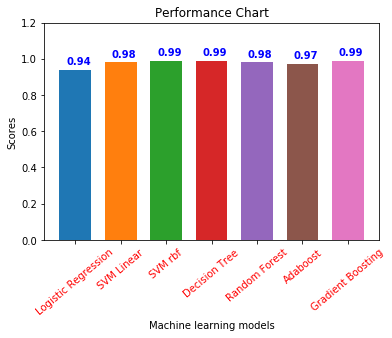

In [62]:
plt.xticks(x_plots, x_labels, color = 'red', rotation = 40)
for i in range(7):
    plt.text(x= x_plots[i]-0.2, y= y_plots[i]+0.03, s = "%.2f" %(y_plots[i]), color='blue', fontweight='bold')
    plt.bar(x_plots[i], y_plots[i], width=0.7)
plt.ylim([0,1.2])
plt.title("Performance Chart")
plt.xlabel("Machine learning models")
plt.ylabel("Scores")
plt.show()